In [1]:
from numpy import vstack
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from tqdm import tqdm
from pathlib import Path
import pandas as pd
from PIL import Image
import numpy as np
from torch import long, tensor
from torch.utils.data.dataset import Dataset
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import torch
import torch.nn.init as init
import torch.nn as nn
from torch import Tensor

from torch.nn import (Conv2d, CrossEntropyLoss, Linear, MaxPool2d, ReLU,Sequential, functional)
from pathlib import Path
from typing import Dict, List, Union
import pandas as pd
import torch
import torch.nn.init as init
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from torch import Tensor
from torch.nn import (Conv2d, CrossEntropyLoss, Linear, MaxPool2d, ReLU,Sequential)
from torch.optim import Adam
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader
import itertools
import matplotlib.pyplot as plt


In [2]:
dirPath = Path('C:/Users/myste/git/COMP6721_Applied_AI__Project_Team_AMW_Part2')
datasetPath  = Path(dirPath/'dataset')
noMaskPath  = datasetPath/'NoMask'
N95MaskPath = datasetPath/'N95'
clothMaskPath  = datasetPath/'Cloth'
surgicalMaskPath = datasetPath/'Surgical'
N95ValvePath = datasetPath/'N95Valve'
maskDF = pd.DataFrame()

for imagepath in tqdm(list(noMaskPath .iterdir()), desc='no'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 0
    }, ignore_index=True)
    
for imagepath in tqdm(list(clothMaskPath .iterdir()), desc='cloth'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 1
    }, ignore_index=True)

for imagepath in tqdm(list(N95MaskPath.iterdir()), desc='N95'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 2
    }, ignore_index=True)

for imagepath in tqdm(list(surgicalMaskPath.iterdir()), desc='surgical'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 3
    }, ignore_index=True)


for imagepath in tqdm(list(N95ValvePath.iterdir()), desc='valve'):
    maskDF = maskDF.append({
        'image': str(imagepath),
        'mask': 4
    }, ignore_index=True)
        

print("Total no. of images:",len(maskDF))
data_frame = datasetPath/'dataset.pickle'
print(f'DataFrame saved successfully: {data_frame}')
maskDF.to_pickle(data_frame)

no:   0%|                                                                                      | 0/410 [00:00<?, ?it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:   0%|▏                                                                             | 1/410 [00:00<03:19,  2.05it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning:

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:   9%|██████▉                                                                      | 37/410 [00:01<00:07, 53.08it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:  17%|█████████████▎                                                               | 71/410 [00:01<00:05, 57.14it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:  26%|███████████████████▊                                                        | 107/4

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:  42%|████████████████████████████████▎                                           | 174/410 [00:03<00:03, 67.80it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:  51%|███████████████████████████████████████                                     | 211/4

no:  59%|████████████████████████████████████████████▋                               | 241/410 [00:04<00:02, 65.34it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:  68%|███████████████████████████████████████████████████▎                        | 277/410 [00:04<00:02, 60.12it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:  76%|█████████████████████████████████████████████████████████▍                  | 310/410 [00:05<00:01, 53.39it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


no:  84%|███████████████████████████████████████████████████████████████▊            | 344/410 [00:06<00:01, 62.78it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
no:  93%|██████████████████████████████████████████████████████████████████████▌     | 381/410 [00:06<00:00, 69.78it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.

cloth:   8%|█████▉                                                                    | 35/435 [00:00<00:09, 43.95it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
cloth:  17%|████████████▏                                                             | 72/435 [00:01<00:06, 52.07it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
cloth:  24%|█████████████████▊                                                       | 106/435 [00:02<00:05, 60.52it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
cloth:  32%|███████████████████████▋                                                 | 141/4

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
cloth:  40%|█████████████████████████████▏                                           | 174/435 [00:03<00:04, 58.30it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


cloth:  47%|██████████████████████████████████▍                                      | 205/435 [00:03<00:03, 57.60it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
cloth:  56%|████████████████████████████████████████▌                                | 242/435 [00:04<00:02, 64.38it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
cloth:  64%|██████████████████████████████████████████████▍                          | 277/4

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.

cloth:  78%|█████████████████████████████████████████████████████████▏               | 341/435 [00:06<00:01, 49.70it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
cloth:  94%|████████████████████████████████████████████████████████████████████▉    | 411/435 [00:07<00:00, 52.34it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
N95:   2%|█▎                                                                           | 7/402 [00:00<00:06, 61.63it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


N95:  10%|███████▌                                                                    | 40/402 [00:00<00:06, 55.08it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
N95:  19%|██████████████▌                                                             | 77/402 [00:01<00:04, 66.80it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


N95:  27%|████████████████████▎                                                      | 109/402 [00:01<00:05, 53.87it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


N95:  35%|██████████████████████████▍                                                | 142/402 [00:02<00:04, 54.25it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
N95:  45%|█████████████████████████████████▊                                         | 181/4

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
N95:  53%|███████████████████████████████████████▌                                   | 212/402 [00:03<00:03, 55.36it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
N95:  70%|████████████████████████████████████████████████████▍                      | 281/402 [00:05<00:02, 57.80it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


N95:  78%|██████████████████████████████████████████████████████████▏                | 312/402 [00:05<00:01, 54.37it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


N95:  86%|████████████████████████████████████████████████████████████████▎          | 345/402 [00:06<00:01, 55.10it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:23: FutureWarning: The frame.

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  20%|█████████████▊                                                         | 82/420 [00:01<00:05, 59.71it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  27%|███████████████████                                                   | 114/420 [00:02<00:05, 53.31it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  35%|████████████████████████▊                                             | 149/420 [00:02<00:05, 48.18it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  44%|██████████████████████████████▋                                       | 184/420 [00:03<00:04, 55.64it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  51%|████████████████████████████████████                                  | 216/420 [00:03<00:02, 70.08it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  61%|██████████████████████████████████████████▌                           | 255/420 [00:04<00:02, 64.01it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  69%|████████████████████████████████████████████████▎                     | 290/420 [00:05<00:02, 53.16it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  77%|█████████████████████████████████████████████████████▋                | 322/420 [00:05<00:01, 56.76it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  85%|███████████████████████████████████████████████████████████▋          | 358/4

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
surgical:  93%|█████████████████████████████████████████████████████████████████▏    | 391/420 [00:06<00:00, 53.56it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
valve:  10%|███████▏                                                                  | 39/402 [00:00<00:05, 60.62it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
valve:  18%|█████████████                                                             | 71/402 [00:01<00:05, 55.55it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


valve:  26%|██████████████████▉                                                      | 104/402 [00:01<00:05, 58.84it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
valve:  35%|█████████████████████████▌                                               | 141/402 [00:02<00:03, 66.13it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
valve:  44%|███████████████████████████████▊                                         | 175/402 [00:03<00:03, 57.73it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


valve:  51%|█████████████████████████████████████▍                                   | 206/402 [00:03<00:03, 50.99it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
valve:  61%|████████████████████████████████████████████▎                            | 244/4

C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
valve:  69%|██████████████████████████████████████████████████                       | 276/402 [00:04<00:02, 56.90it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
valve:  77%|████████████████████████████████████████████████████████▍                | 311/402 [00:05<00:01, 60.78it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


valve:  85%|██████████████████████████████████████████████████████████████▎          | 343/402 [00:06<00:01, 57.41it/s]C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
C:\Users\myste\AppData\Local\Temp\ipykernel_22452\741201046.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maskDF = maskDF.append({
valve:  95%|█████████████████████████████████████████████████████████████████████    | 380/4

Total no. of images: 2069
DataFrame saved successfully: C:\Users\myste\git\COMP6721_Applied_AI__Project_Team_AMW_Part2\dataset\dataset.pickle


In [3]:
class mask_dataset(Dataset):
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        self.transformations = Compose([
            Resize((32, 32)),
            ToTensor(),
            Normalize((0.5667, 0.5198, 0.4955),(0.3082, 0.2988, 0.3053))
        ])
    
    def __getitem__(self, key):
        if isinstance(key, slice):
            raise NotImplementedError('Supporting Slice')
        
        row = self.dataFrame.iloc[key]
        image = Image.open(row['image']).convert('RGB')
        return {
          'image': self.transformations(image),
          'mask': tensor([row['mask']], dtype=long),
          'path': row['image']
        }
    
    def __len__(self):
        return len(self.dataFrame.index)

In [4]:
                     
class face_mask_detection_CNN(nn.Module):
    def __init__(self):
        super(face_mask_detection_CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(8 * 8 * 64, 1000),
            nn.ReLU(inplace=True),
            nn.Linear(1000, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 5)
        )
    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

face_mask_detector_cnn = face_mask_detection_CNN()
print(face_mask_detector_cnn)

face_mask_detection_CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.01, inplace=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slope=0.01, inp

In [5]:

def conf_mat(cm, classes, normalize=False, title='Visualization of the confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def prepare_data(mask_df_path) -> None:
        mask_df = pd.read_pickle(mask_df_path)
        print(mask_df['mask'].value_counts())
        skf = StratifiedKFold(n_splits=10, shuffle=True)
        train_folds = []
        val_fold = []
        for train_index, validate_index in skf.split(mask_df, mask_df['mask']):
            train_folds.append(mask_dataset(mask_df.iloc[train_index]))
            val_fold.append(mask_dataset(mask_df.iloc[validate_index]))
        return [ train_folds, val_fold,CrossEntropyLoss() ]

def train_dataloader(train_df) -> DataLoader:
    return DataLoader(train_df, batch_size=32, shuffle=True, num_workers=0)

def val_dataloader(validate_df) -> DataLoader:
    return DataLoader(validate_df, batch_size=32, num_workers=0)   

train_dfs, validate_dfs, cross_entropy_loss = prepare_data(data_frame)

1    435
3    420
0    410
2    402
4    402
Name: mask, dtype: int64


In [6]:
epochs = 10
lr = 0.001 
retrain = False

import warnings
warnings.filterwarnings('ignore')

def training(train_fold):
    acc_list = []
    loss_list = []
    optimizer = Adam(face_mask_detector_cnn.parameters(), lr=lr)
    for epoch in range(epochs):
        total=0
        correct=0
        loss_train = 0.0
        for i, data in enumerate(train_dataloader(train_fold), 0):
            inputs, labels = data['image'], data['mask']
            labels = labels.flatten()
            outputs = face_mask_detector_cnn(inputs)
            loss = cross_entropy_loss(outputs, labels)
            loss_list.append(loss.item())
            optimizer.zero_grad() 
            loss.backward()
            optimizer.step()
            #training accuracy
            total += labels.size(0)
            _, predicted = torch.max(outputs.data, 1) 
            correct += (predicted == labels).sum().item() 
            loss_train += loss
        print('Training Loss after epoch {} : {} Accuracy: {:.2f}%'.format(epoch, loss_train,(correct / total) * 100))

In [7]:

def evaluation(valid_f):
    predictions, actuals = torch.tensor([]), torch.tensor([])
    for i, data in enumerate(val_dataloader(valid_f)):
        inputs, targets = data['image'], data['mask']
        targets = targets.flatten()
        output = face_mask_detector_cnn(inputs)
        output = torch.argmax(output,axis=1)
        predictions = torch.cat((predictions, output.flatten()), dim=0)
        actuals = torch.cat((actuals, targets), dim=0)

    return (confusion_matrix(actuals.numpy(), predictions.numpy()),accuracy_score(actuals, predictions),*precision_recall_fscore_support(actuals.numpy(), predictions.numpy(),average='macro'))

Running Fold : 1
Training Loss after epoch 0 : 66.5443115234375 Accuracy: 54.67%
Training Loss after epoch 1 : 46.17664337158203 Accuracy: 70.89%
Training Loss after epoch 2 : 39.4726448059082 Accuracy: 74.65%
Training Loss after epoch 3 : 32.870635986328125 Accuracy: 79.16%
Training Loss after epoch 4 : 29.61846351623535 Accuracy: 81.42%
Training Loss after epoch 5 : 25.086631774902344 Accuracy: 84.85%
Training Loss after epoch 6 : 24.429929733276367 Accuracy: 84.53%
Training Loss after epoch 7 : 22.07504653930664 Accuracy: 86.47%
Training Loss after epoch 8 : 17.488203048706055 Accuracy: 88.45%
Training Loss after epoch 9 : 13.252532958984375 Accuracy: 91.78%
Running Fold : 2
Training Loss after epoch 0 : 68.46067810058594 Accuracy: 53.65%
Training Loss after epoch 1 : 44.78142547607422 Accuracy: 71.16%
Training Loss after epoch 2 : 37.44734573364258 Accuracy: 76.75%
Training Loss after epoch 3 : 32.830039978027344 Accuracy: 80.77%
Training Loss after epoch 4 : 27.140718460083008 Acc

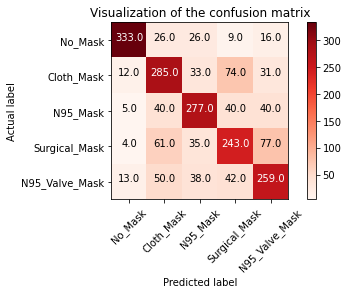

In [8]:
fold_results = []
fold_confusion_matrix = np.zeros((5,5))
classes = ['No_Mask', 'Cloth_Mask', 'N95_Mask', 'Surgical_Mask', 'N95_Valve_Mask']

for index in range(len(train_dfs)):
    print("Running Fold : "+ str(index+1))
    training(train_dfs[index])
    fold_result = evaluation(validate_dfs[index])
    fold_results.append(fold_result[1:-1])
    fold_confusion_matrix = np.add(fold_confusion_matrix,fold_result[0])
    if index != len(train_dfs)-1:
        face_mask_detector_cnn = face_mask_detection_CNN()
#printing the metrics (accuracy,precision,recall,f-scores )and confusion matrix
metrics_df = pd.DataFrame(fold_results, columns=['accuracy', 'precision', 'recall', 'f-score'])
print()
print("Metrics")
print(metrics_df.mean())
print()
print("Across 10-folds")
conf_mat(fold_confusion_matrix, classes)

In [9]:
torch.save(face_mask_detector_cnn, dirPath/'face_mask_detection_CNN.pt')

valve: 100%|█████████████████████████████████████████████████████████████████████████| 104/104 [00:02<00:00, 45.11it/s]


C:\Users\myste\git\COMP6721_Applied_AI__Project_Team_AMW_Part2\testDataset\random\test_DataSet (48).jpg
Predicted:  N95_Valve_Mask


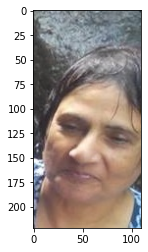

In [10]:
#to predict new images
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

class_mapping = {
    0: "No_Mask",
    1: "Cloth_Mask",
    2: "N95_Mask",
    3: "Surgical_Mask",
    4: "N95_Valve_Mask"
}

def prepare_predict_df():
    testDatasetPath = dirPath/'testDataset' #path to new test data. (not used in training, developement and validation) 
    testRandomPath = testDatasetPath/'random'
    testDF = pd.DataFrame()
    
    for imagepath in tqdm(list(testRandomPath .iterdir()), desc='no'):
        testDF = testDF.append({
            'image': str(imagepath),
            'mask': 0
        }, ignore_index=True)

    for imagepath in tqdm(list(testRandomPath .iterdir()), desc='cloth'):
        testDF = testDF.append({
            'image': str(imagepath),
            'mask': 1
        }, ignore_index=True)

    for imagepath in tqdm(list(testRandomPath.iterdir()), desc='N95'):
        testDF = testDF.append({
            'image': str(imagepath),
            'mask': 2
        }, ignore_index=True)

    for imagepath in tqdm(list(testRandomPath.iterdir()), desc='surgical'):
        testDF = testDF.append({
            'image': str(imagepath),
            'mask': 3
        }, ignore_index=True)

    for imagepath in tqdm(list(testRandomPath.iterdir()), desc='valve'):
        testDF = testDF.append({
            'image': str(imagepath),
            'mask': 4
        }, ignore_index=True)

    return mask_dataset(testDF)

def predict():
    test_df = prepare_predict_df()
    rand_sampler = torch.utils.data.RandomSampler(test_df, num_samples=32, replacement=True)
    data = iter(DataLoader(test_df, batch_size=32, num_workers=0, sampler=rand_sampler)).next()
    inputs,targets = data['image'], data['mask']
    output = face_mask_detector_cnn(inputs)
    output = torch.argmax(output,axis=1)
    rand_ind = random.choice(list(range(0,32)))
    print(data['path'][rand_ind])
    img = Image.open(data['path'][rand_ind])
    plt.imshow(np.asarray(img))
    print("Predicted: ",class_mapping[output[rand_ind].tolist()])

predict()

valve: 100%|█████████████████████████████████████████████████████████████████████████| 162/162 [00:03<00:00, 44.76it/s]


Confusion matrix without normalization
[[175  11   1   0   3]
 [  4 173  14   3  17]
 [  0  11 154   4   7]
 [  0  20   5 158  23]
 [  0  13   1   6 197]]
Fold results for males:  (0.857, 0.8675946038998082, 0.8581564474987428, 0.860298295517733)


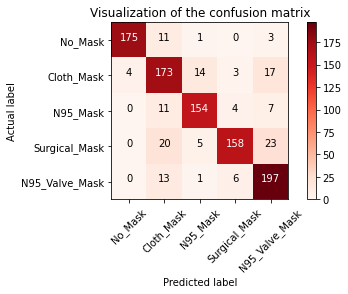

In [11]:
#GenderGroup - Male
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from torch import long, tensor
import torch

class_mapping = {
    0: "No_Mask",
    1: "Cloth_Mask",
    2: "N95_Mask",
    3: "Surgical_Mask",
    4: "N95_Valve_Mask"
}

def prepare_predict_df():
    datasetPath = dirPath/'testDataset/GenderGroup' #path to new test data. (not used in training, developement and validation) 
    malePath = datasetPath/'Male'
   
    noMaleMaskPath  = malePath/'NoMask'
    N95MaleMaskPath = malePath/'N95'
    clothMaleMaskPath  = malePath/'Cloth'
    surgicalMaleMaskPath = malePath/'Surgical'
    N95MaleValvePath = malePath/'N95Valve'
    
    testDF = pd.DataFrame()
    
    for imgPath in tqdm(list(noMaleMaskPath.iterdir()), desc='no'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 0
        }, ignore_index=True)

    for imgPath in tqdm(list(clothMaleMaskPath.iterdir()), desc='cloth'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 1
        }, ignore_index=True)

    for imgPath in tqdm(list(N95MaleMaskPath.iterdir()), desc='N95'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 2
        }, ignore_index=True)
        
    for imgPath in tqdm(list(surgicalMaleMaskPath.iterdir()), desc='surgical'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 3
        }, ignore_index=True)
        
    for imagepath in tqdm(list(N95MaleValvePath.iterdir()), desc='valve'):
        testDF = testDF.append({
            'image': str(imagepath),
            'mask': 4
        }, ignore_index=True)
            
    return mask_dataset(testDF)

def predict():
    predictions, actuals = torch.tensor([]), torch.tensor([])
    test_dfTest = prepare_predict_df()
    rand_sampler = torch.utils.data.RandomSampler(test_dfTest, num_samples=1000, replacement=True)
    data = iter(DataLoader(test_dfTest, batch_size=1000, num_workers=0, sampler=rand_sampler)).next()
    inputs,targets = data['image'], data['mask']
    targets = targets.flatten()


    output = face_mask_detector_cnn(inputs)
    output = torch.argmax(output,axis=1)
    predictions = torch.cat((predictions, output.flatten()), dim=0)
    actuals = torch.cat((actuals, targets), dim=0)
    
    return (confusion_matrix(actuals.numpy(), predictions.numpy()),accuracy_score(actuals, predictions),*precision_recall_fscore_support(actuals.numpy(), predictions.numpy(),average='macro'))

fold_result_test = predict()
fold_confusion_matrix_test = fold_result_test[0]
fold_result_test_metrics = fold_result_test[1:-1]
conf_mat(fold_confusion_matrix_test, classes)

print("Fold results for males: ",fold_result_test_metrics)

valve: 100%|█████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 44.61it/s]


Confusion matrix without normalization
[[188   7   0   0   0]
 [  1 193   0   1  12]
 [  0   9 185   3  13]
 [  0  16   0 183   3]
 [  0   8   0   2 176]]
Fold results for females:  (0.925, 0.9308068482519378, 0.9259198496025182, 0.9263547476674319)


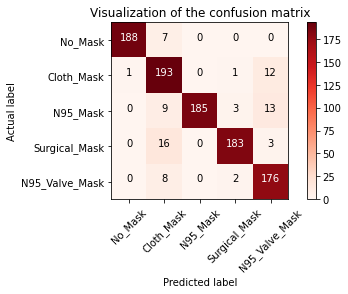

In [12]:
#GenderGroup - Female
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

class_mapping = {
    0: "No_Mask",
    1: "Cloth_Mask",
    2: "N95_Mask",
    3: "Surgical_Mask",
    4: "N95_Valve_Mask"
}

def prepare_predict_df():
    datasetPath = dirPath/'testDataset/GenderGroup' #path to new test data. (not used in training, developement and validation) 
    femalePath = datasetPath/'Female'
   
    noFemaleMaskPath  = femalePath/'NoMask'
    N95FemaleMaskPath = femalePath/'N95'
    clothFemaleMaskPath  = femalePath/'Cloth'
    surgicalFemaleMaskPath = femalePath/'Surgical'
    N95FemaleValvePath = femalePath/'N95Valve'
    
    testDF = pd.DataFrame()
    
    for imgPath in tqdm(list(noFemaleMaskPath.iterdir()), desc='no'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 0
        }, ignore_index=True)

    for imgPath in tqdm(list(clothFemaleMaskPath.iterdir()), desc='cloth'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 1
        }, ignore_index=True)

    for imgPath in tqdm(list(N95FemaleMaskPath.iterdir()), desc='N95'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 2
        }, ignore_index=True)
        
    for imgPath in tqdm(list(surgicalFemaleMaskPath.iterdir()), desc='surgical'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 3
        }, ignore_index=True)
        
    for imagepath in tqdm(list(N95FemaleValvePath.iterdir()), desc='valve'):
        testDF = testDF.append({
            'image': str(imagepath),
            'mask': 4
        }, ignore_index=True)
            
    return mask_dataset(testDF)

def predict():
    predictions, actuals = torch.tensor([]), torch.tensor([])
    test_dfTest = prepare_predict_df()
    rand_sampler = torch.utils.data.RandomSampler(test_dfTest, num_samples=1000, replacement=True)
    data = iter(DataLoader(test_dfTest, batch_size=1000, num_workers=0, sampler=rand_sampler)).next()
    inputs,targets = data['image'], data['mask']
    targets = targets.flatten()


    output = face_mask_detector_cnn(inputs)
    output = torch.argmax(output,axis=1)
    predictions = torch.cat((predictions, output.flatten()), dim=0)
    actuals = torch.cat((actuals, targets), dim=0)
    
    return (confusion_matrix(actuals.numpy(), predictions.numpy()),accuracy_score(actuals, predictions),*precision_recall_fscore_support(actuals.numpy(), predictions.numpy(),average='macro'))

fold_result_test = predict()
fold_confusion_matrix_test = fold_result_test[0]
fold_result_test_metrics = fold_result_test[1:-1]
conf_mat(fold_confusion_matrix_test, classes)

print("Fold results for females: ",fold_result_test_metrics)

valve: 100%|█████████████████████████████████████████████████████████████████████████| 236/236 [00:05<00:00, 44.69it/s]


Confusion matrix without normalization
[[116  26   5   0   3]
 [  0 143   0   0   0]
 [  0  96  60   0   3]
 [  0 128   0  18   0]
 [  0  22  14  13 353]]
Fold results for GenZ Group:  (0.69, 0.7336008107014809, 0.6304177895737133, 0.6040086881206033)


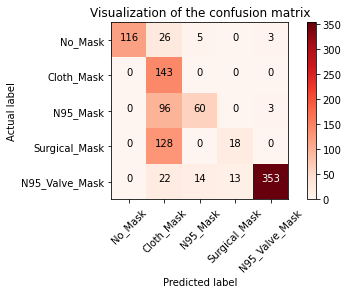

In [13]:
#AgeGroup - GenZ
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

class_mapping = {
    0: "No_Mask",
    1: "Cloth_Mask",
    2: "N95_Mask",
    3: "Surgical_Mask",
    4: "N95_Valve_Mask"
}

def prepare_predict_df():
    datasetPath = dirPath/'testDataset/AgeGroup' #path to new test data. (not used in training, developement and validation) 
    genZPath = datasetPath/'GenZ'

    genZNoMaskPath = genZPath/'NoMask'
    genZClothMaskPath = genZPath/'Cloth'
    genZN95MaskPath = genZPath/'N95'
    genZSurgicalMaskPath = genZPath/'Surgical'
    genZValveMaskPath = genZPath/'N95Valve'
    
    testDF = pd.DataFrame()
      
    for imgPath in tqdm(list(genZNoMaskPath.iterdir()), desc='no'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 0
        }, ignore_index=True)

    for imgPath in tqdm(list(genZClothMaskPath.iterdir()), desc='cloth'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 1
        }, ignore_index=True)

    for imgPath in tqdm(list(genZN95MaskPath.iterdir()), desc='N95'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 2
        }, ignore_index=True)
        
    for imgPath in tqdm(list(genZSurgicalMaskPath.iterdir()), desc='surgical'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 3
        }, ignore_index=True)
    
    for imgPath in tqdm(list(genZValveMaskPath.iterdir()), desc='valve'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 4
        }, ignore_index=True)
            
    return mask_dataset(testDF)

def predict():
    predictions, actuals = torch.tensor([]), torch.tensor([])
    test_dfTest = prepare_predict_df()
    rand_sampler = torch.utils.data.RandomSampler(test_dfTest, num_samples=1000, replacement=True)
    data = iter(DataLoader(test_dfTest, batch_size=1000, num_workers=0, sampler=rand_sampler)).next()
    inputs,targets = data['image'], data['mask']
    targets = targets.flatten()


    output = face_mask_detector_cnn(inputs)
    output = torch.argmax(output,axis=1)
    predictions = torch.cat((predictions, output.flatten()), dim=0)
    actuals = torch.cat((actuals, targets), dim=0)
    
    return (confusion_matrix(actuals.numpy(), predictions.numpy()),accuracy_score(actuals, predictions),*precision_recall_fscore_support(actuals.numpy(), predictions.numpy(),average='macro'))

fold_result_test = predict()
fold_confusion_matrix_test = fold_result_test[0]
fold_result_test_metrics = fold_result_test[1:-1]
conf_mat(fold_confusion_matrix_test, classes)

print("Fold results for GenZ Group: ",fold_result_test_metrics)

valve: 100%|█████████████████████████████████████████████████████████████████████████| 147/147 [00:03<00:00, 44.83it/s]


Confusion matrix without normalization
[[ 92  99   5   0   3]
 [  3 172   0   0   7]
 [  0  98  87   2   0]
 [  0 177   0  32   0]
 [  0   4   9   0 210]]
Fold results for Millennial Group:  (0.593, 0.8076512778212805, 0.5934842456552898, 0.5822836223398076)


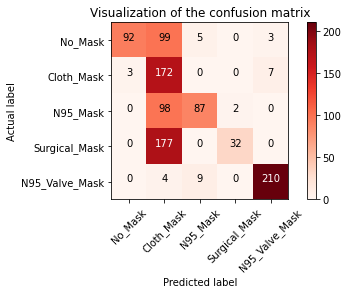

In [14]:
#AgeGroup - Millennial
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

class_mapping = {
    0: "No_Mask",
    1: "Cloth_Mask",
    2: "N95_Mask",
    3: "Surgical_Mask",
    4: "N95_Valve_Mask"
}

def prepare_predict_df():
    datasetPath = dirPath/'testDataset/AgeGroup' #path to new test data. (not used in training, developement and validation) 
    millennialPath = datasetPath/'Millennial'

    millennialNoMaskPath = millennialPath/'NoMask'
    millennialClothMaskPath = millennialPath/'Cloth'
    millennialN95MaskPath = millennialPath/'N95'
    millennialSurgicalMaskPath = millennialPath/'Surgical'
    millennialValveMaskPath = millennialPath/'N95Valve'
    
    testDF = pd.DataFrame()
    
    for imgPath in tqdm(list(millennialNoMaskPath.iterdir()), desc='no'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 0
        }, ignore_index=True)

    for imgPath in tqdm(list(millennialClothMaskPath.iterdir()), desc='cloth'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 1
        }, ignore_index=True)

    for imgPath in tqdm(list(millennialN95MaskPath.iterdir()), desc='N95'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 2
        }, ignore_index=True)
        
    for imgPath in tqdm(list(millennialSurgicalMaskPath.iterdir()), desc='surgical'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 3
        }, ignore_index=True)
            
    for imgPath in tqdm(list(millennialValveMaskPath.iterdir()), desc='valve'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 4
        }, ignore_index=True)
        
    return mask_dataset(testDF)

def predict():
    predictions, actuals = torch.tensor([]), torch.tensor([])
    test_dfTest = prepare_predict_df()
    rand_sampler = torch.utils.data.RandomSampler(test_dfTest, num_samples=1000, replacement=True)
    data = iter(DataLoader(test_dfTest, batch_size=1000, num_workers=0, sampler=rand_sampler)).next()
    inputs,targets = data['image'], data['mask']
    targets = targets.flatten()


    output = face_mask_detector_cnn(inputs)
    output = torch.argmax(output,axis=1)
    predictions = torch.cat((predictions, output.flatten()), dim=0)
    actuals = torch.cat((actuals, targets), dim=0)
    
    return (confusion_matrix(actuals.numpy(), predictions.numpy()),accuracy_score(actuals, predictions),*precision_recall_fscore_support(actuals.numpy(), predictions.numpy(),average='macro'))

fold_result_test = predict()
fold_confusion_matrix_test = fold_result_test[0]
fold_result_test_metrics = fold_result_test[1:-1]
conf_mat(fold_confusion_matrix_test, classes)

print("Fold results for Millennial Group: ",fold_result_test_metrics)

valve: 100%|███████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 34.20it/s]


Confusion matrix without normalization
[[ 86 101   2   0   1]
 [  0 153  18   0   5]
 [  0  99 324   8  18]
 [  0 156   0   4   0]
 [  0   0   0   0  25]]
Fold results for Boomer Group:  (0.592, 0.6171974542089875, 0.6137106648479875, 0.521848220179722)


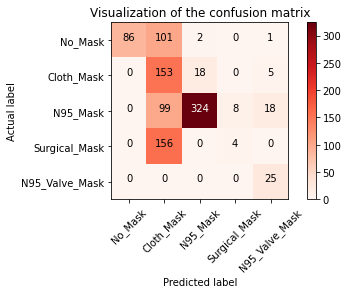

In [15]:
#AgeGroup - Boomer
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

class_mapping = {
    0: "No_Mask",
    1: "Cloth_Mask",
    2: "N95_Mask",
    3: "Surgical_Mask",
    4: "N95_Valve_Mask"
}

def prepare_predict_df():
    datasetPath = dirPath/'testDataset/AgeGroup' #path to new test data. (not used in training, developement and validation) 
    boomerPath = datasetPath/'Boomer'

    boomerNoMaskPath = boomerPath/'NoMask'
    boomerClothMaskPath = boomerPath/'Cloth'
    boomerN95MaskPath = boomerPath/'N95'
    boomerSurgicalMaskPath = boomerPath/'Surgical'
    boomerValveMaskPath = boomerPath/'N95Valve'
    
    
    testDF = pd.DataFrame()
    
    for imgPath in tqdm(list(boomerNoMaskPath.iterdir()), desc='no'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 0
        }, ignore_index=True)

    for imgPath in tqdm(list(boomerClothMaskPath.iterdir()), desc='cloth'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 1
        }, ignore_index=True)

    for imgPath in tqdm(list(boomerN95MaskPath.iterdir()), desc='N95'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 2
        }, ignore_index=True)
        
    for imgPath in tqdm(list(boomerSurgicalMaskPath.iterdir()), desc='surgical'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 3
        }, ignore_index=True)
    
    for imgPath in tqdm(list(boomerValveMaskPath.iterdir()), desc='valve'):
        testDF = testDF.append({
            'image': str(imgPath),
            'mask': 4
        }, ignore_index=True)
            
    return mask_dataset(testDF)

def predict():
    predictions, actuals = torch.tensor([]), torch.tensor([])
    test_dfTest = prepare_predict_df()
    rand_sampler = torch.utils.data.RandomSampler(test_dfTest, num_samples=1000, replacement=True)
    data = iter(DataLoader(test_dfTest, batch_size=1000, num_workers=0, sampler=rand_sampler)).next()
    inputs,targets = data['image'], data['mask']
    targets = targets.flatten()


    output = face_mask_detector_cnn(inputs)
    output = torch.argmax(output,axis=1)
    predictions = torch.cat((predictions, output.flatten()), dim=0)
    actuals = torch.cat((actuals, targets), dim=0)
    
    return (confusion_matrix(actuals.numpy(), predictions.numpy()),accuracy_score(actuals, predictions),*precision_recall_fscore_support(actuals.numpy(), predictions.numpy(),average='macro'))

fold_result_test = predict()
fold_confusion_matrix_test = fold_result_test[0]
fold_result_test_metrics = fold_result_test[1:-1]
conf_mat(fold_confusion_matrix_test, classes)

print("Fold results for Boomer Group: ",fold_result_test_metrics)